# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [763]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [765]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [767]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [439]:
# Try loading one file
df = pd.read_parquet(r"C:\Masters-Course\EDA Assignment NYC taxi\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [25]:
import os
import pandas as pd

# Select the folder having data files
os.chdir(r'C:\Masters-Course\EDA Assignment NYC taxi\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# Initialize a list to collect sampled data across all files
final_sampled_data = []

# Iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        print(f"Processing file: {file_name}")
        file_path = os.path.join(os.getcwd(), file_name)

        # Read the parquet file
        temp_df = pd.read_parquet(file_path)

        # Ensure the datetime column exists
        if 'tpep_pickup_datetime' not in temp_df.columns:
            raise KeyError("'tpep_pickup_datetime' not found in file.")

        # Extract date and hour
        temp_df['tpep_pickup_datetime'] = pd.to_datetime(temp_df['tpep_pickup_datetime'])
        temp_df['pickup_date'] = temp_df['tpep_pickup_datetime'].dt.date
        temp_df['pickup_hour'] = temp_df['tpep_pickup_datetime'].dt.hour

        # Collect hourly samples for this file
        sampled_rows = []

        for date in sorted(temp_df['pickup_date'].unique()):
            for hour in range(24):
                hourly_df = temp_df[(temp_df['pickup_date'] == date) & (temp_df['pickup_hour'] == hour)]
                if not hourly_df.empty:
                    sample_df = hourly_df.sample(frac=0.01, random_state=42)
                    sampled_rows.append(sample_df)

        # Combine and store sampled data from this file
        if sampled_rows:
            sampled_data = pd.concat(sampled_rows, ignore_index=True)
            final_sampled_data.append(sampled_data)
            print(f"Sampled {len(sampled_data)} rows from {file_name}")
        else:
            print(f"No rows sampled from {file_name}")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Final result: one DataFrame with all samples
if final_sampled_data:
    df = pd.concat(final_sampled_data, ignore_index=True)
    print("Final sampled DataFrame:")
    df.info()
else:
    print("No data was sampled from any file.")

Processing file: 2023-1.parquet
Sampled 152087 rows from 2023-1.parquet
Processing file: 2023-10.parquet
Sampled 174255 rows from 2023-10.parquet
Processing file: 2023-11.parquet
Sampled 165133 rows from 2023-11.parquet
Processing file: 2023-12.parquet
Sampled 166709 rows from 2023-12.parquet
Processing file: 2023-2.parquet
Sampled 168696 rows from 2023-2.parquet
Processing file: 2023-3.parquet
Sampled 163786 rows from 2023-3.parquet
Processing file: 2023-4.parquet
Sampled 139641 rows from 2023-4.parquet
Processing file: 2023-5.parquet
Sampled 144458 rows from 2023-5.parquet
Processing file: 2023-6.parquet
Sampled 162910 rows from 2023-6.parquet
Processing file: 2023-7.parquet
Sampled 174068 rows from 2023-7.parquet
Processing file: 2023-8.parquet
Sampled 143782 rows from 2023-8.parquet
Processing file: 2023-9.parquet
Sampled 140875 rows from 2023-9.parquet
Final sampled DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 co

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [413]:
# Store the df in csv/parquet
df.to_parquet(r"C:\Masters-Course\EDA Assignment NYC taxi\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\Sampled1percent.parquet")

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [769]:
# Load the new data file
df = pd.read_parquet(r"C:\Masters-Course\EDA Assignment NYC taxi\Datasets and Dictionary-NYC\Datasets and Dictionary\sampledfies\Sampled1percent.parquet")

In [771]:
df.head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
5         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
6         2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
7         2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
8         2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   
9         1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   
5           7.10         1.0                  N           246            37   
6           1.59         1.0                  N            79           164   
7           3.16         1.0                  N            79           256   
8           7.64         1.0                  N           132            95   
9           0.90         1.0                  N           148           114   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   
5             1  ...      0.5        7.90           0.0   
6             1  ...      0.5        3.28           0.0   
7             1  ...      0.5        6.02           0.0   
8             1  ...      0.5        7.09           0.0   
9             1  ...      0.5        1.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   
5                    1.0         47.40                   2.5         0.00   
6                    1.0         19.68                   2.5         0.00   
7                    1.0         30.12                   2.5         0.00   
8                    1.0         42.54                   0.0         1.25   
9                    1.0         13.90                   2.5         0.00   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  
5   2023-01-01            0         NaN  
6   2023-01-01            0         NaN  
7   2023-01-01            0         NaN  
8   2023-01-01            0         NaN  
9   2023-01-01            0         NaN  

[10 rows x 22 columns]

In [773]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               379268 non-null  int64         
 1   tpep_pickup_datetime   379268 non-null  datetime64[us]
 2   tpep_dropoff_datetime  379268 non-null  datetime64[us]
 3   passenger_count        366326 non-null  float64       
 4   trip_distance          379268 non-null  float64       
 5   RatecodeID             366326 non-null  float64       
 6   store_and_fwd_flag     366326 non-null  object        
 7   PULocationID           379268 non-null  int64         
 8   DOLocationID           379268 non-null  int64         
 9   payment_type           379268 non-null  int64         
 10  fare_amount            379268 non-null  float64       
 11  extra                  379268 non-null  float64       
 12  mta_tax                379268 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [775]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [777]:
# Combine the two airport fee columns
def combine_Airport_fee(row):
    val1 = row['airport_fee']
    val2 = row['Airport_fee']

    
    if pd.isna(val1) and pd.isna(val2):
        return None
    elif pd.isna(val1):
        return val2
    elif pd.isna(val2):
        return val1
    elif val1 == val2:
        return val1
    else:
        return val1

# Apply the function row-wise
df['airport_fee_combined'] = df.apply(combine_Airport_fee, axis=1)

# Drop original columns and rename
df.drop(columns=['airport_fee', 'Airport_fee'], inplace=True)
df.rename(columns={'airport_fee_combined': 'airport_fee'}, inplace=True)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [779]:
# check where values of fare amount are negative

print("Number of negative fare_amount rows:", (df['fare_amount'] < 0).sum())

Number of negative fare_amount rows: 0


Did you notice something different in the `RatecodeID` column for above records?

In [781]:
# Analyse RatecodeID for the negative fare amounts
ratecode_for_negative_fare = df[df['fare_amount'] < 0][['fare_amount', 'RatecodeID']]
print(ratecode_for_negative_fare)

Empty DataFrame
Columns: [fare_amount, RatecodeID]
Index: []


In [783]:
# Find which columns have negative values

df.columns = df.columns.str.strip()
quant_col = df.select_dtypes(include='number')
negative_columns = quant_col.columns[(quant_col < 0).any()].tolist()
print("Columns with negative values:", negative_columns)
df.info()

Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               379268 non-null  int64         
 1   tpep_pickup_datetime   379268 non-null  datetime64[us]
 2   tpep_dropoff_datetime  379268 non-null  datetime64[us]
 3   passenger_count        366326 non-null  float64       
 4   trip_distance          379268 non-null  float64       
 5   RatecodeID             366326 non-null  float64       
 6   store_and_fwd_flag     366326 non-null  object        
 7   PULocationID           379268 non-null  int64         
 8   DOLocationID           379268 non-null  int64         
 9   payment_type           379268 non-null  int64         
 10  fare_amount            379268 non

In [785]:
# fix these negative values
df = df[(df[negative_columns] >= 0).all(axis=1)]
df.head()
quant_col = df.select_dtypes(include='number')
negative_columns_remaining = quant_col.columns[(quant_col < 0).any()].tolist()
print("Columns with negative values:", negative_columns_remaining)
df.info()

Columns with negative values: []
<class 'pandas.core.frame.DataFrame'>
Index: 366310 entries, 0 to 379267
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               366310 non-null  int64         
 1   tpep_pickup_datetime   366310 non-null  datetime64[us]
 2   tpep_dropoff_datetime  366310 non-null  datetime64[us]
 3   passenger_count        366310 non-null  float64       
 4   trip_distance          366310 non-null  float64       
 5   RatecodeID             366310 non-null  float64       
 6   store_and_fwd_flag     366310 non-null  object        
 7   PULocationID           366310 non-null  int64         
 8   DOLocationID           366310 non-null  int64         
 9   payment_type           366310 non-null  int64         
 10  fare_amount            366310 non-null  float64       
 11  extra                  366310 non-null  float64       
 12  mta_tax         

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [787]:
# Find the proportion of missing values in each column
missing_cols = df.isna().mean()
print(missing_cols)

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
pickup_date              0.0
pickup_hour              0.0
airport_fee              0.0
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [789]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
median_val = df['passenger_count'].median()
df['passenger_count'].fillna(median_val, inplace=True)

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [791]:
# Fix missing values in 'RatecodeID'
mode_ratecodeID = df['RatecodeID'].mode()[0]
df['RatecodeID'].fillna(mode_ratecodeID, inplace=True)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [793]:
# handle null values in congestion_surcharge
#using Median approach as it is money filed removing or making zero would corrpt results
median_val = df['congestion_surcharge'].median()
df['congestion_surcharge'].fillna(median_val, inplace=True)



Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [795]:
# Handle any remaining missing values
cols_to_check_Nan = ['VendorID', 
'tpep_pickup_datetime',
'tpep_dropoff_datetime',
'passenger_count',  
'trip_distance',        
'RatecodeID',           
'store_and_fwd_flag',   
'PULocationID',         
'DOLocationID',         
'payment_type',         
'fare_amount',          
'extra',                
'mta_tax',              
'tip_amount',           
'tolls_amount',         
'improvement_surcharge',
'total_amount',         
'congestion_surcharge', 
'pickup_date',          
'pickup_hour',          
'airport_fee']

nan_counts = df[cols_to_check_Nan].isna().sum()
print("NaN values in selected columns:")
print(nan_counts)
df.info()

NaN values in selected columns:
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_date              0
pickup_hour              0
airport_fee              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 366310 entries, 0 to 379267
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               366310 non-null  int64         
 1   tpep_pickup_datetime   366310 non-null  datetime64[us]
 2   tpep_dropoff_datetime  366310 non-nul

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [799]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

#removing as there are only less rows it wont impact data set 
condition = (df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)
count = df[condition].shape[0]

print(f"Number of rows with trip_distance < 0.1 and fare_amount > 300: {count}")

#remomving them 

df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]
df.info()

Number of rows with trip_distance < 0.1 and fare_amount > 300: 7
<class 'pandas.core.frame.DataFrame'>
Index: 366303 entries, 0 to 379267
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               366303 non-null  int64         
 1   tpep_pickup_datetime   366303 non-null  datetime64[us]
 2   tpep_dropoff_datetime  366303 non-null  datetime64[us]
 3   passenger_count        366303 non-null  float64       
 4   trip_distance          366303 non-null  float64       
 5   RatecodeID             366303 non-null  float64       
 6   store_and_fwd_flag     366303 non-null  object        
 7   PULocationID           366303 non-null  int64         
 8   DOLocationID           366303 non-null  int64         
 9   payment_type           366303 non-null  int64         
 10  fare_amount            366303 non-null  float64       
 11  extra                  366303 non-null  floa

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [801]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366298 entries, 0 to 379267
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               366298 non-null  int64         
 1   tpep_pickup_datetime   366298 non-null  datetime64[us]
 2   tpep_dropoff_datetime  366298 non-null  datetime64[us]
 3   passenger_count        366298 non-null  float64       
 4   trip_distance          366298 non-null  float64       
 5   RatecodeID             366298 non-null  float64       
 6   store_and_fwd_flag     366298 non-null  object        
 7   PULocationID           366298 non-null  int64         
 8   DOLocationID           366298 non-null  int64         
 9   payment_type           366298 non-null  int64         
 10  fare_amount            366298 non-null  float64       
 11  extra                  366298 non-null  float64       
 12  mta_tax                366298 non-null  float64  

In [803]:
# Continue with outlier handling
#condition to find suspicious entries based on condition 2, remove them as they are very few

df = df[~(
    (df['trip_distance'] == 0) &
    (df['fare_amount'] == 0) &
    (df['PULocationID'] != df['DOLocationID'])
)]
df.info()
#Entries where `trip_distance` is more than 250  miles.remove them as they are only few

df = df[df['trip_distance'] <= 250]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366290 entries, 0 to 379267
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               366290 non-null  int64         
 1   tpep_pickup_datetime   366290 non-null  datetime64[us]
 2   tpep_dropoff_datetime  366290 non-null  datetime64[us]
 3   passenger_count        366290 non-null  float64       
 4   trip_distance          366290 non-null  float64       
 5   RatecodeID             366290 non-null  float64       
 6   store_and_fwd_flag     366290 non-null  object        
 7   PULocationID           366290 non-null  int64         
 8   DOLocationID           366290 non-null  int64         
 9   payment_type           366290 non-null  int64         
 10  fare_amount            366290 non-null  float64       
 11  extra                  366290 non-null  float64       
 12  mta_tax                366290 non-null  float64  

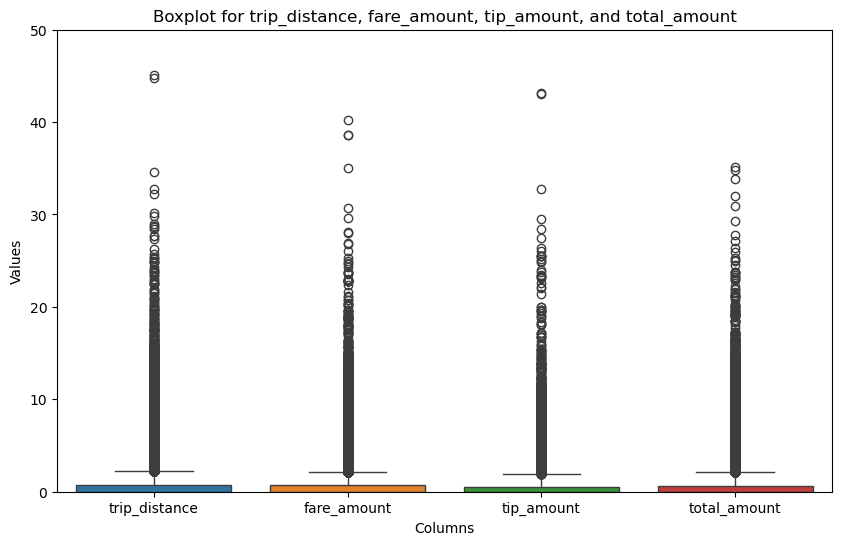

In [805]:
# Do any columns need standardising?
#yes, indeed, the below thre columns shows in analysis having 3-4k different values where most of them find in same rage with few outliers

#trip Distance
q1 = df['trip_distance'].quantile(0.25)
q3 = df['trip_distance'].quantile(0.75)
iqr = q3 - q1

df['trip_distance'] = (df['trip_distance'] - df['trip_distance'].median()) / iqr

# fare amount
q1 = df['fare_amount'].quantile(0.25)
q3 = df['fare_amount'].quantile(0.75)
iqr = q3 - q1

df['fare_amount'] = (df['fare_amount'] - df['fare_amount'].median()) / iqr

#tip_amount
q1 = df['tip_amount'].quantile(0.25)
q3 = df['tip_amount'].quantile(0.75)
iqr = q3 - q1
df['tip_amount'] = (df['tip_amount'] - df['tip_amount'].median()) / iqr

q1 = df['total_amount'].quantile(0.25)
q3 = df['total_amount'].quantile(0.75)
iqr = q3 - q1
df['total_amount'] = (df['total_amount'] - df['total_amount'].median()) / iqr

columns_to_plot = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']

# Create the boxplot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.boxplot(data=df[columns_to_plot])

# Add labels and title
plt.title("Boxplot for trip_distance, fare_amount, tip_amount, and total_amount")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.ylim(0, 50)

# Show the plot
plt.show()

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [1007]:
####Catagorical values and numerical Values
columns_to_check = [
    'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
    'passenger_count', 'trip_distance', 'RatecodeID',
    'PULocationID', 'DOLocationID', 'payment_type',
    'pickup_hour', 'trip_duration'
]

# Function to categorize each column
categorical = []
numerical = []

for col in columns_to_check:
    if pd.api.types.is_numeric_dtype(df[col]):
        numerical.append(col)
    else:
        categorical.append(col)

# Create a DataFrame showing the categorization
category_df = pd.DataFrame({
    'Numerical': pd.Series(numerical),
    'Categorical': pd.Series(categorical)
})

category_df

Numerical            Categorical
0         VendorID   tpep_pickup_datetime
1  passenger_count  tpep_dropoff_datetime
2    trip_distance                    NaN
3       RatecodeID                    NaN
4     PULocationID                    NaN
5     DOLocationID                    NaN
6     payment_type                    NaN
7      pickup_hour                    NaN
8    trip_duration                    NaN

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

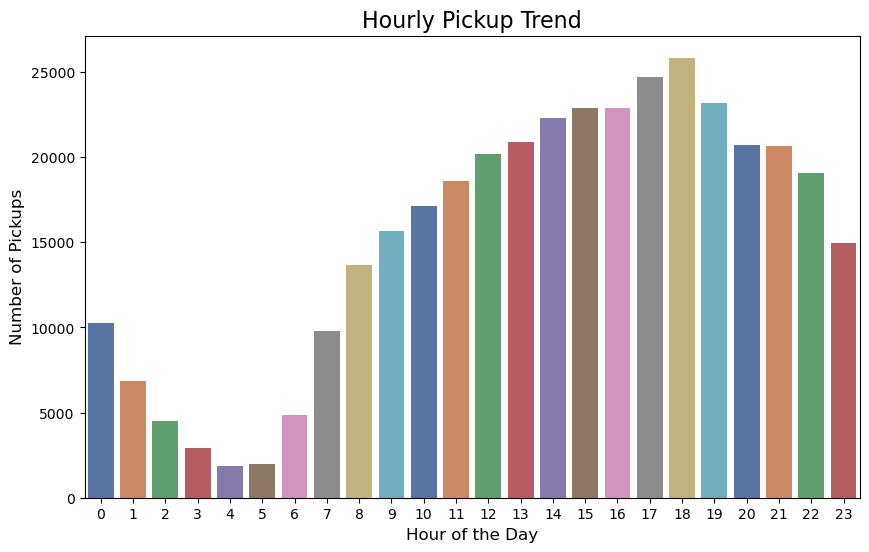

In [809]:
# Find and show the hourly trends in taxi pickups
pickup_hour_counts = df['pickup_hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=pickup_hour_counts.index, y=pickup_hour_counts.values, palette="deep")

# Customize
plt.title("Hourly Pickup Trend", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)

# Show the plot
plt.show()

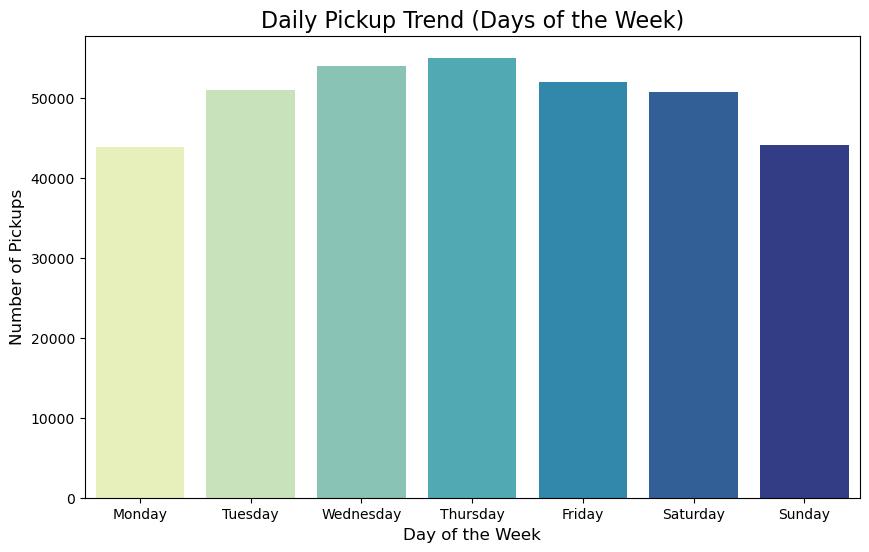

In [861]:
# Find and show the daily trends in taxi pickups (days of the week)

df['pickup_date'] = pd.to_datetime(df['pickup_date'], errors='coerce')
df['day_of_week'] = df['pickup_date'].dt.day_name()
pickup_day_counts = df['day_of_week'].value_counts()
pickup_day_counts = pickup_day_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 6))
sns.barplot(x=pickup_day_counts.index, y=pickup_day_counts.values, palette="YlGnBu")

# Customize the plot with labels and title
plt.title("Daily Pickup Trend (Days of the Week)", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)

# Show the plot
plt.show()

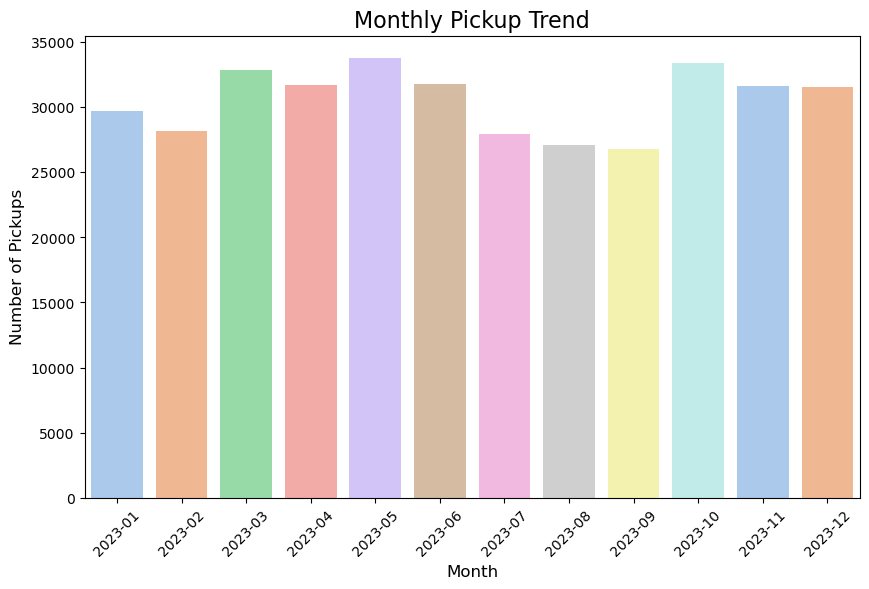

In [811]:
# Show the monthly trends in pickups
df['pickup_date'] = pd.to_datetime(df['pickup_date'], errors='coerce')
df['year_month'] = df['pickup_date'].dt.to_period('M')
monthly_trend = df['year_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))

# Plotting the bar plot
sns.barplot(x=monthly_trend.index.astype(str), y=monthly_trend.values,  palette="pastel")

# Customize the plot with labels and title
plt.title("Monthly Pickup Trend", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [813]:
# Analyse the above parameters
zero_count = (df['trip_distance'] == 0).sum()

# Count of negative values in 'fare_amount'
negative_count = (df['trip_distance'] < 0).sum()

print("Zero values:", zero_count)
print("Negative values:", negative_count)
#-----------------------------------------------------
zero_count = (df['tip_amount'] == 0).sum()

# Count of negative values in 'fare_amount'
negative_count = (df['tip_amount'] < 0).sum()

print("Zero values:", zero_count)
print("Negative values:", negative_count)

#-----------------------------------------------------
zero_count = (df['total_amount'] == 0).sum()

# Count of negative values in 'fare_amount'
negative_count = (df['total_amount'] < 0).sum()

print("Zero values:", zero_count)
print("Negative values:", negative_count)

#-----------------------------------------------------
zero_count = (df['fare_amount'] == 0).sum()

# Count of negative values in 'fare_amount'
negative_count = (df['fare_amount'] < 0).sum()

print("Zero values:", zero_count)
print("Negative values:", negative_count)


Zero values: 724
Negative values: 182708
Zero values: 1720
Negative values: 182646
Zero values: 4555
Negative values: 181094
Zero values: 12166
Negative values: 176814


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [819]:
# Create a df with non zero entries for the selected parameters.

#it wont be ideal to filter out distance column and other columns post Standarization as these are not zero but median
financial_columns = ['fare_amount', 'tip_amount', 'total_amount']

# Count the number of rows where any financial column has a value of 0
zero_count = (df[financial_columns] == 0).any(axis=1).sum()

print(f"Number of rows with zero values in financial columns: {zero_count}")

df = df[(df[financial_columns] != 0).all(axis=1)]
df.info()

Number of rows with zero values in financial columns: 15516
<class 'pandas.core.frame.DataFrame'>
Index: 350772 entries, 0 to 379267
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               350772 non-null  int64         
 1   tpep_pickup_datetime   350772 non-null  datetime64[us]
 2   tpep_dropoff_datetime  350772 non-null  datetime64[us]
 3   passenger_count        350772 non-null  float64       
 4   trip_distance          350772 non-null  float64       
 5   RatecodeID             350772 non-null  float64       
 6   store_and_fwd_flag     350772 non-null  object        
 7   PULocationID           350772 non-null  int64         
 8   DOLocationID           350772 non-null  int64         
 9   payment_type           350772 non-null  int64         
 10  fare_amount            350772 non-null  float64       
 11  extra                  350772 non-null  float64  

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

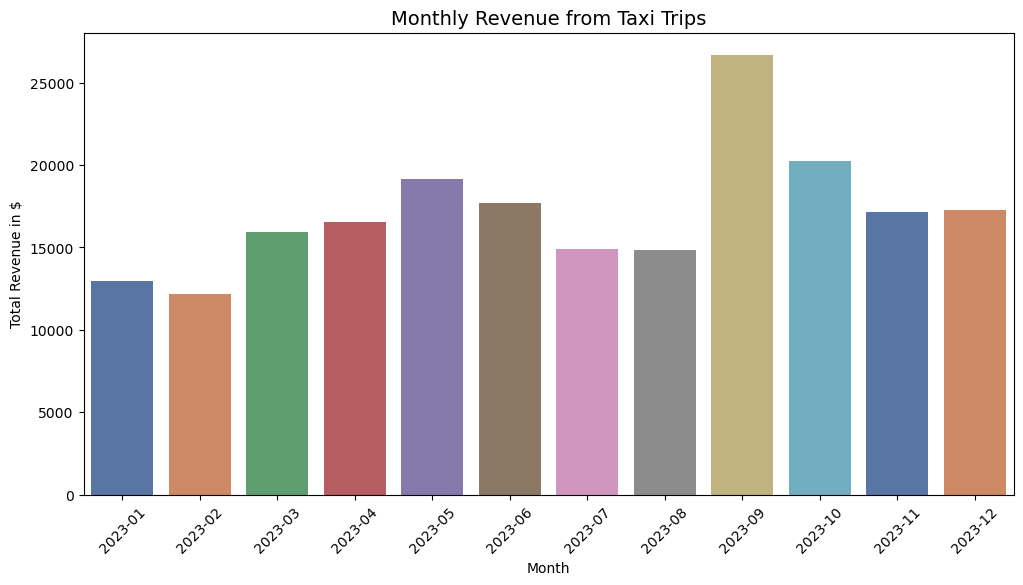

In [821]:
# Group data by month and analyse monthly revenue
monthly_revenue = df.groupby('year_month')['total_amount'].sum().sort_index()

monthly_revenue.index = monthly_revenue.index.astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette='deep')

plt.title("Monthly Revenue from Taxi Trips", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Revenue in $")
plt.xticks(rotation=45)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

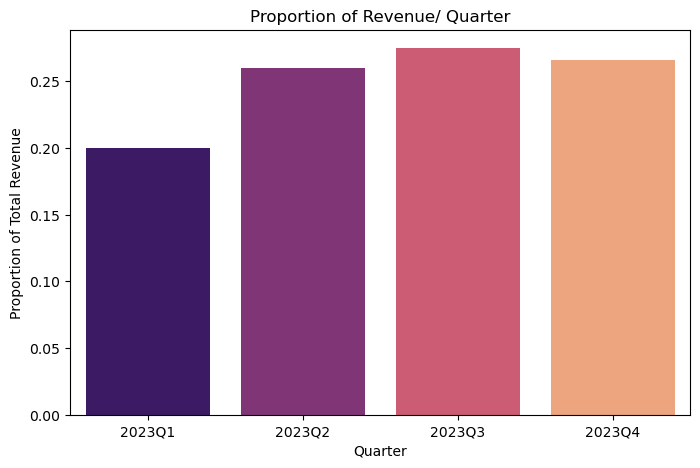

In [823]:
# Calculate proportion of each quarter
#first we need to get quarter
df['quarter'] = df['pickup_date'].dt.to_period('Q')
quarterly_revenue = df.groupby('quarter')['total_amount'].sum()
quarterly_proportion = quarterly_revenue / quarterly_revenue.sum()
plt.figure(figsize=(8,5))
sns.barplot(x=quarterly_proportion.index.astype(str), y=quarterly_proportion.values, palette="magma")
plt.title("Proportion of Revenue/ Quarter")
plt.xlabel("Quarter")
plt.ylabel("Proportion of Total Revenue")

plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

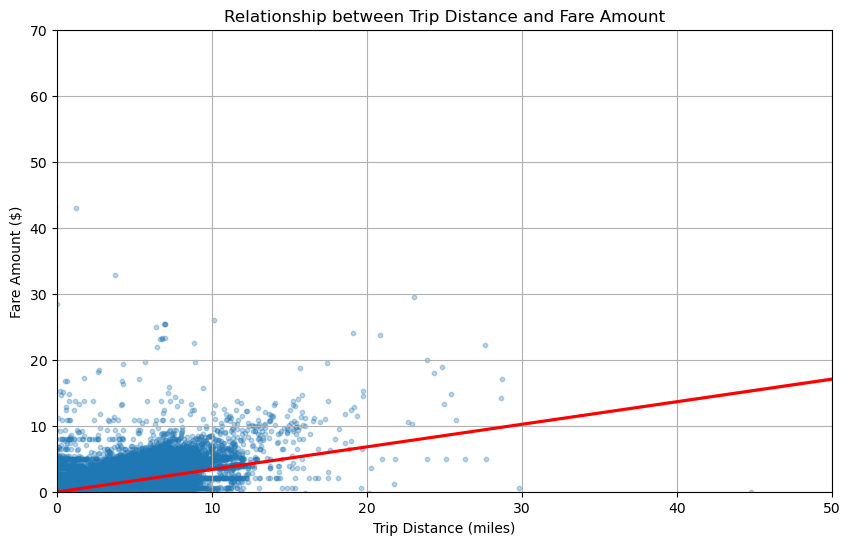

In [991]:
# Show how trip fare is affected by distance
filtered_df = df[df['trip_distance'] != 0]

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=filtered_df,
    x='trip_distance',
    y='tip_amount',
    scatter_kws={'alpha': 0.3, 's': 10},
    line_kws={'color': 'red'}
)

plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.ylim(0,70)
plt.xlim(0,50)
plt.grid(True)
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

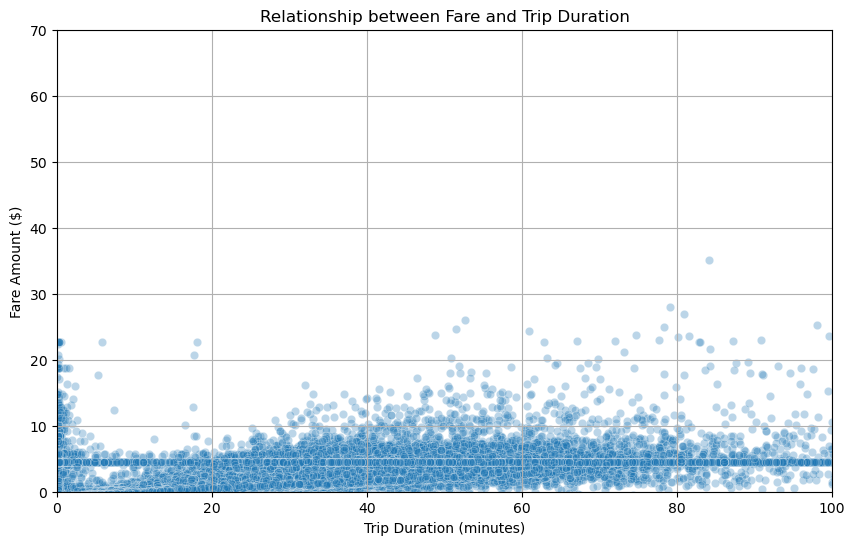

In [827]:
# Show relationship between fare and trip duration
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trip_duration', y='fare_amount', alpha=0.3)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.title('Relationship between Fare and Trip Duration')
plt.ylim(0,70)
plt.xlim(0,100)
plt.grid(True)
plt.show()


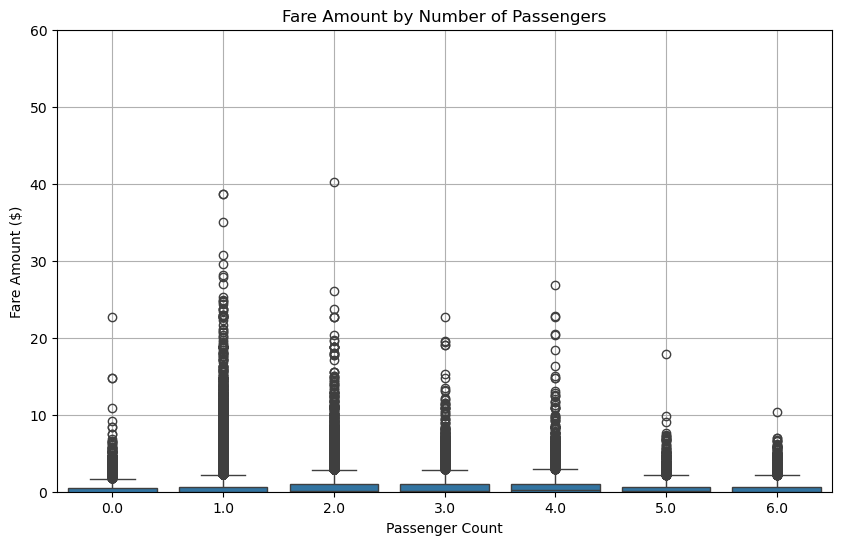

In [829]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='passenger_count', y='fare_amount')

# Add titles and labels
plt.title('Fare Amount by Number of Passengers')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.ylim(0, 60)
# Show the plot
plt.show()


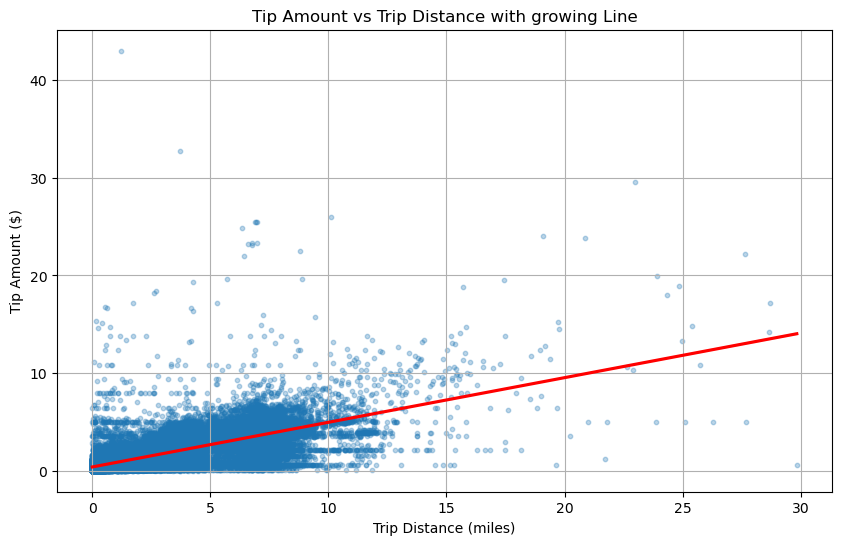

In [831]:
# Show relationship between tip and trip distance

filtered_df = df[(df['trip_distance'] > 0) & (df['tip_amount'] >= 0)]

# Set plot size
plt.figure(figsize=(10, 6))

# Create regression plot with trend line
sns.regplot(
    data=filtered_df,
    x='trip_distance',
    y='tip_amount',
    scatter_kws={'alpha': 0.3, 's': 10},
    line_kws={'color': 'red'}
)

# Add labels and title
plt.title('Tip Amount vs Trip Distance with growing Line')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)

plt.show()



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

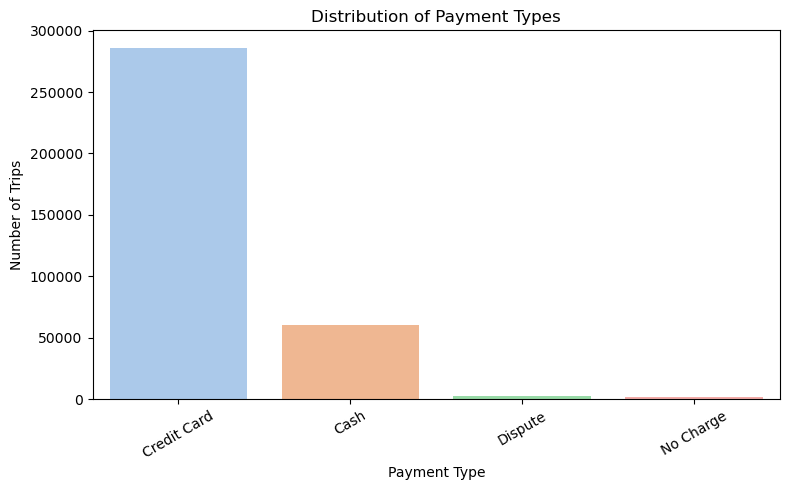

In [833]:
# Analyse the distribution of different payment types (payment_type).
payment_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute'
}
df['payment_type_label'] = df['payment_type'].map(payment_mapping)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='payment_type_label', order=df['payment_type_label'].value_counts().index, palette='pastel')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [235]:
!pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ----- ---------------------------------- 2.1/16.2 MB 11.7 MB/s eta 0:00:02
   ------- -------------------------------- 2.9/16.2 MB 6.7 MB/s eta 0:00:02
   ---------- ----------------------------- 4.2/16.2 MB 7.2 MB/s eta 0:00:02
   ------------ --------------------------- 5.0/16.2 MB 5.8 MB/s eta 0:00:02
   ------------- -------------------------- 5.5/16.2 MB 5.5 MB/s eta 0:00:02
   ------------------ --------------------- 7.6/16.2 MB 5.9 MB/s eta 0:00:02
   -------------------- ------------------- 8.4/16.2 MB 5.7 MB/s eta 0:00:02
   ------------------------ --------------- 10.0/16.2 MB 5.9 MB/s eta 0:00:02
   --------------------------- ------------ 11.0/16.2 MB 5.8 MB/s eta 0:00:01
   ------------------------------ --------- 12.3/16.2 MB 5.8 MB/s eta 0:00:01
   ---------------------------------- ----- 13.9/16.2 MB 5.9 MB/s eta 0:00:01
   ------------------------------------ --- 14.7/16.2 MB 6.0 MB/s eta 0:00:01


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [835]:
import geopandas as gpd
# Read the shapefile using geopandas
zones = gpd.read_file(r"C:\Masters-Course\EDA Assignment NYC taxi\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp")# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

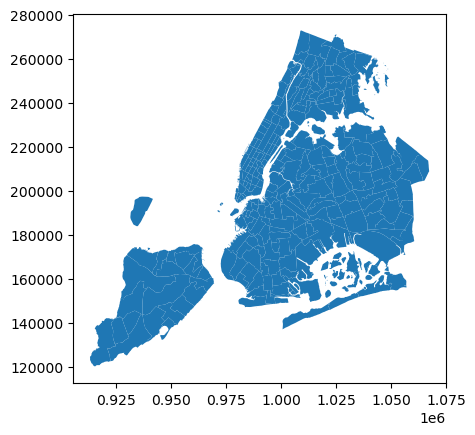

In [837]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [839]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(df, zones, how='left', left_on='PULocationID', right_on='LocationID')
merged_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0       2.602620         1.0                  N           138           256   
1      -0.235808         1.0                  N           161           237   
2      -0.148472         1.0                  N           237           141   
3      -0.541485         1.0                  N           143           142   
4       2.323144         1.0                  N           246            37   

   payment_type  ...  quarter  trip_duration  payment_type_label  OBJECTID  \
0             2  ...   2023Q1      15.950000                Cash     138.0   
1             1  ...   2023Q1       5.083333         Credit Card     161.0   
2             2  ...   2023Q1      10.550000                Cash     237.0   
3             2  ...   2023Q1       5.416667                Cash     143.0   
4             1  ...   2023Q1      33.616667         Credit Card     246.0   

   Shape_Leng  Shape_Area                       zone  LocationID    borough  \
0    0.107467    0.000537          LaGuardia Airport       138.0     Queens   
1    0.035804    0.000072             Midtown Center       161.0  Manhattan   
2    0.042213    0.000096      Upper East Side South       237.0  Manhattan   
3    0.054180    0.000151        Lincoln Square West       143.0  Manhattan   
4    0.069467    0.000281  West Chelsea/Hudson Yards       246.0  Manhattan   

                                            geometry  
0  MULTIPOLYGON (((1019904.219 225677.983, 102031...  
1  POLYGON ((991081.026 214453.698, 990952.644 21...  
2  POLYGON ((993633.442 216961.016, 993507.232 21...  
3  POLYGON ((989338.1 223572.253, 989368.225 2235...  
4  POLYGON ((983031.177 217138.506, 983640.32 216...  

[5 rows x 32 columns]

In [843]:
merged_df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350797 entries, 0 to 350796
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               350797 non-null  int64         
 1   tpep_pickup_datetime   350797 non-null  datetime64[us]
 2   tpep_dropoff_datetime  350797 non-null  datetime64[us]
 3   passenger_count        350797 non-null  float64       
 4   trip_distance          350797 non-null  float64       
 5   RatecodeID             350797 non-null  float64       
 6   store_and_fwd_flag     350797 non-null  object        
 7   PULocationID           350797 non-null  int64         
 8   DOLocationID           350797 non-null  int64         
 9   payment_type           350797 non-null  int64         
 10  fare_amount            350797 non-null  float64       
 11  extra                  350797 non-null  float64       
 12  mta_tax                350797 non-null  floa

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [971]:
# Group data by location and calculate the number of trips
pickup_counts = df.groupby('PULocationID').size().reset_index(name='pickup_trip_count')
print(pickup_trips)


     PULocationID  pickup_trip_count
117           132              19225
216           237              16608
145           161              16193
215           236              14880
123           138              12669


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

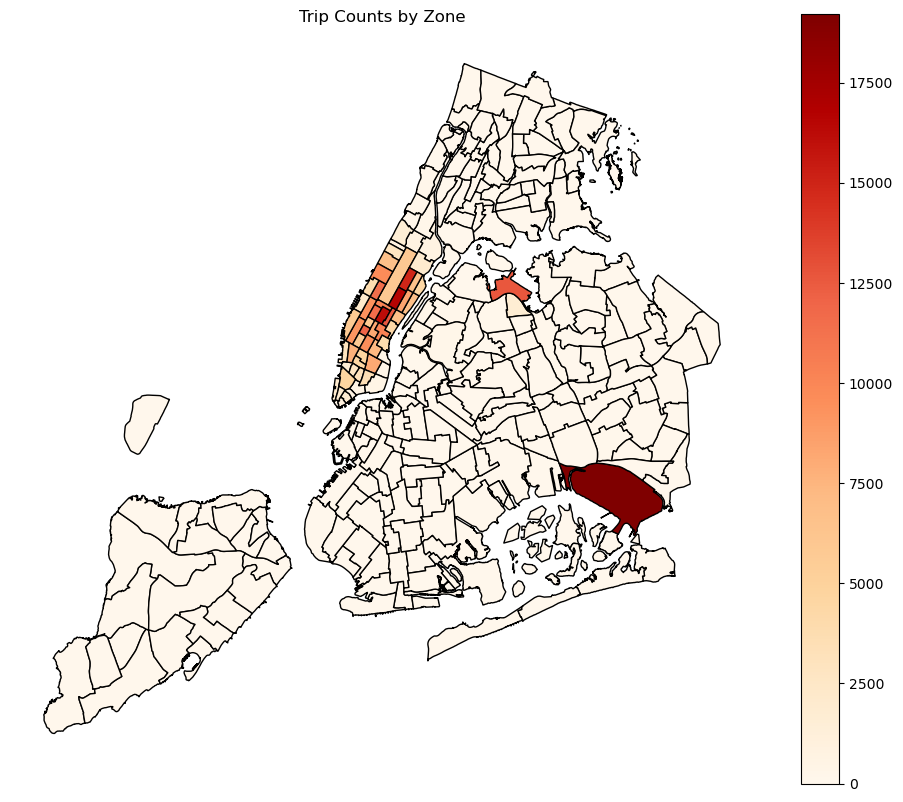

In [847]:
# Merge trip counts back to the zones GeoDataFrame
trip_counts_by_zone = merged_df.groupby('LocationID').size().reset_index(name='pickup_trip_count')
zones = zones.merge(trip_counts_by_zone, on='LocationID', how='left')
zones['trip_count'] = zones['pickup_trip_count'].fillna(0).astype(int)

fig, ax = plt.subplots(figsize=(12, 10))
zones.plot(column='trip_count', ax=ax, legend=True, cmap='OrRd', edgecolor='black')
plt.title("Trip Counts by Zone")
plt.axis('off')
plt.show()

In [ ]:
top_location_ids = zones.sort_values('trip_count', ascending=False)[['LocationID', 'trip_count']]

# Display the top results (e.g., top 10)
print(top_location_ids.head(10))

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

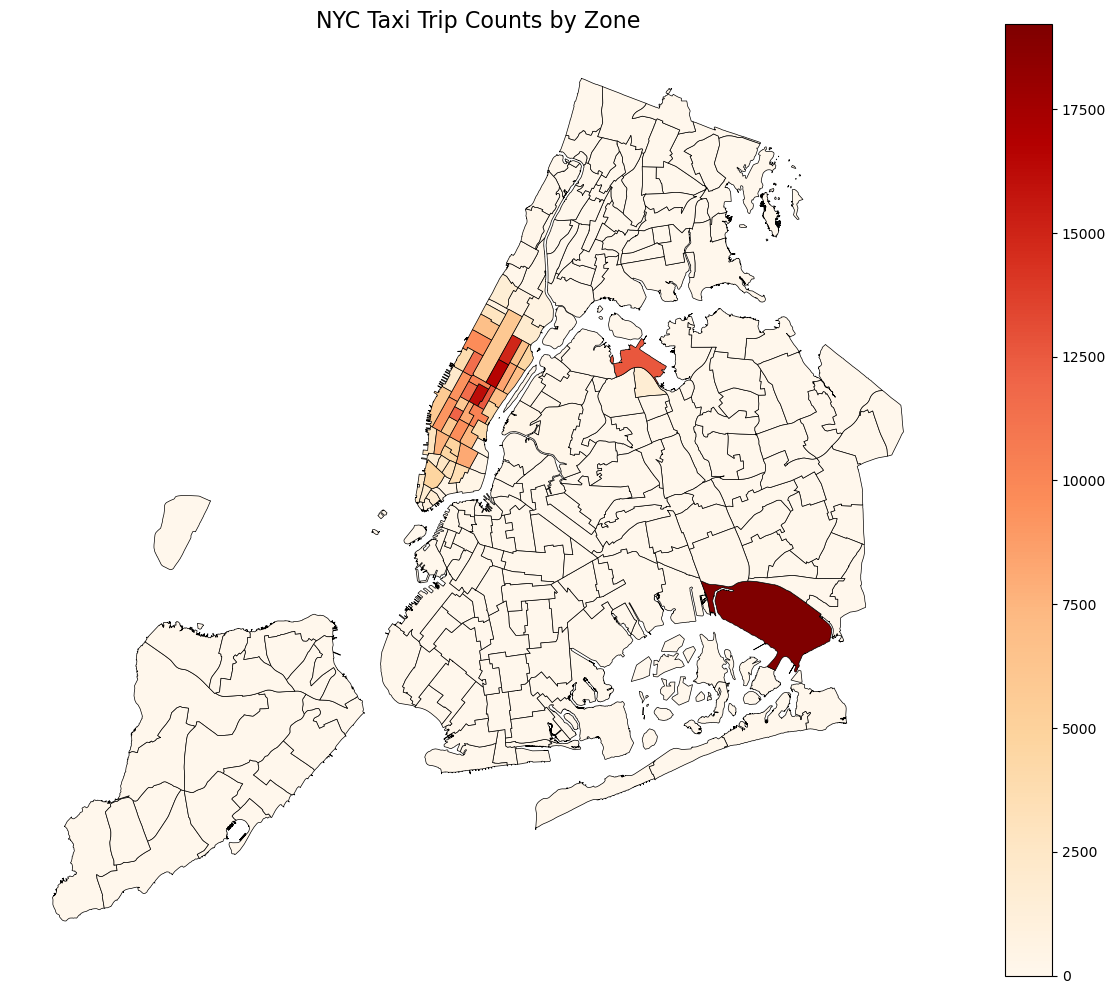

<Figure size 640x480 with 0 Axes>

In [849]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Step 2: Create choropleth map
zones.plot(
    column='trip_count',        
    ax=ax,                      
    legend=True,                 
    cmap='OrRd',                
    edgecolor='black',         
    linewidth=0.5             
)

# Step 3: Customize plot
ax.set_title('NYC Taxi Trip Counts by Zone', fontsize=16)
ax.axis('off')  
plt.tight_layout()
plt.show()

# Plot the map and display it

# Step 2: Plot GeoDataFrame
zones.plot(
    column='trip_count',  # Replace with your actual data column
    ax=ax,
    legend=True,
    legend_kwds={
        'label': "Number of Taxi Trips",
        'orientation': "horizontal"
    },
    cmap='OrRd',         # You can choose other colormaps too
    edgecolor='black',
    linewidth=0.5
)

ax.set_title("NYC Taxi Trips by Zone", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()


In [967]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones = zones.sort_values(by='trip_count', ascending=False)

# Display the top zones by number of trips
print(sorted_zones[['zone', 'trip_count']].head(10)) 

                             zone  trip_count
131                   JFK Airport       19225
236         Upper East Side South       16608
160                Midtown Center       16193
235         Upper East Side North       14880
137             LaGuardia Airport       12669
161                  Midtown East       12589
185  Penn Station/Madison Sq West       12050
229     Times Sq/Theatre District       11551
141           Lincoln Square East       11430
169                   Murray Hill       10280


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

##### Operational Efficiency

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [981]:
# Find routes which have the slowest speeds at different times of the day

# Step 1: Filter out invalid trips (zero or negative distance or duration)
filtered = merged_df[
    (merged_df['trip_distance'] > 0) & 
    (merged_df['trip_duration'] > 0)
]

# Step 2: Group by route and hour, and calculate average trip distance and duration
route_hourly_speed = (
    filtered.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])
    .agg({
        'trip_distance': 'mean',
        'trip_duration': 'mean'
    })
    .reset_index()
)

# Step 3: Compute speed (miles per hour)
route_hourly_speed['speed_mph'] = route_hourly_speed['trip_distance'] / (route_hourly_speed['trip_duration'] / 60)

# Step 4: Find the slowest route for each hour
slowest_routes = (
    route_hourly_speed.sort_values(['pickup_hour', 'speed_mph'])
    .groupby('pickup_hour')
    .first()
    .reset_index()
)

# Step 5: Add pickup and dropoff zone names for readability
# PU zone
zone_lookup_PU = (
    merged_df[['PULocationID', 'zone']]
    .drop_duplicates()
    .rename(columns={'PULocationID': 'LocationID', 'zone': 'PU_zone'})
)
# DO zone
zone_lookup_DO = (
    merged_df[['DOLocationID', 'zone']]
    .drop_duplicates()
    .rename(columns={'DOLocationID': 'LocationID', 'zone': 'DO_zone'})
)

# Merge zone names
slowest_routes = slowest_routes.merge(
    zone_lookup_PU, left_on='PULocationID', right_on='LocationID', how='left'
).drop(columns='LocationID')

slowest_routes = slowest_routes.merge(
    zone_lookup_DO, left_on='DOLocationID', right_on='LocationID', how='left'
).drop(columns='LocationID')

# Step 6: Final output
print(
    slowest_routes[['pickup_hour', 'PULocationID', 'PU_zone', 'DOLocationID', 'DO_zone', 'speed_mph']]
    .sort_values('pickup_hour').head(10)
    .to_string(index=False)
)

 pickup_hour  PULocationID      PU_zone  DOLocationID                       DO_zone  speed_mph
           0            68 East Chelsea           137 Sutton Place/Turtle Bay North   0.007687
           0            68 East Chelsea           137                      Union Sq   0.007687
           0            68 East Chelsea           137                 East Flushing   0.007687
           0            68 East Chelsea           137                Central Harlem   0.007687
           0            68 East Chelsea           137                       Bedford   0.007687
           0            68 East Chelsea           137                Bushwick South   0.007687
           0            68 East Chelsea           137                  Battery Park   0.007687
           0            68 East Chelsea           137                      Woodside   0.007687
           0            68 East Chelsea           137              Garment District   0.007687
           0            68 East Chelsea           

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

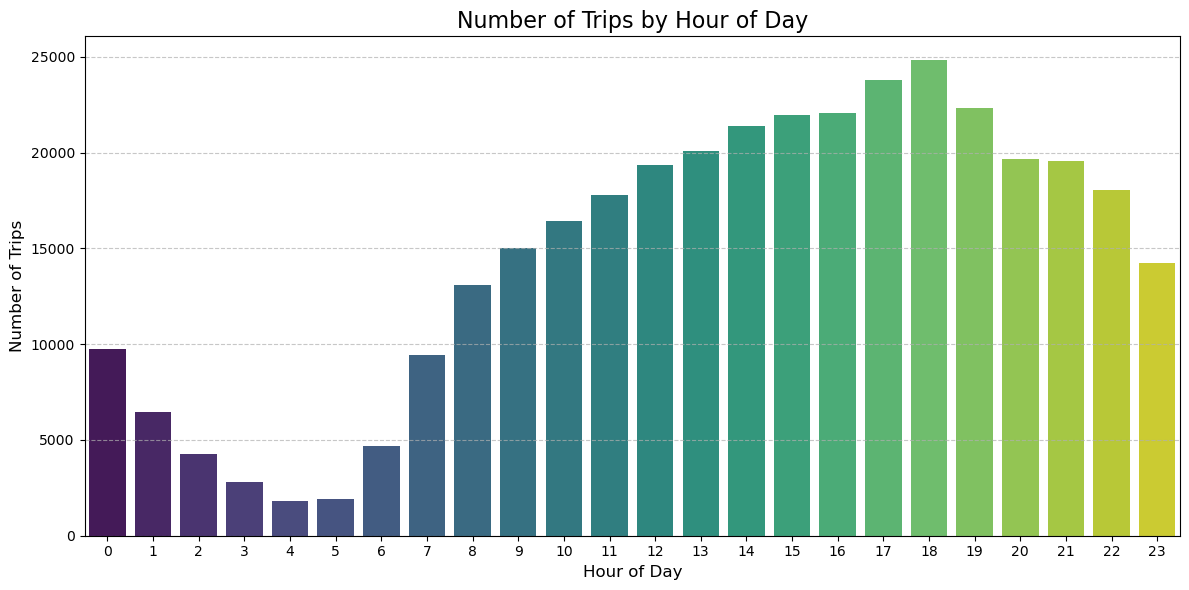

In [855]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trips = df['pickup_hour'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette="viridis")

plt.title("Number of Trips by Hour of Day", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

Top 5 Busiest Hours by Trip Count:
pickup_hour
18    133938
17    127867
19    119662
16    117512
15    117407
dtype: int64


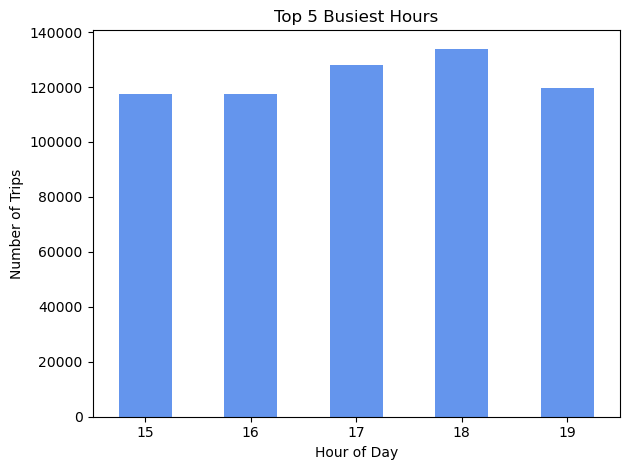

In [857]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
Complete_df = pd.read_parquet(r"C:\Masters-Course\EDA Assignment NYC taxi\Datasets and Dictionary-NYC\Datasets and Dictionary\sampledfies\Sampled5percent.parquet")
busiest_hours = Complete_df.groupby('pickup_hour').size().sort_values(ascending=False).head(5)

# Display the results
print("Top 5 Busiest Hours by Trip Count:")
print(busiest_hours)
busiest_hours.sort_index().plot(kind='bar', color='cornflowerblue', title='Top 5 Busiest Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

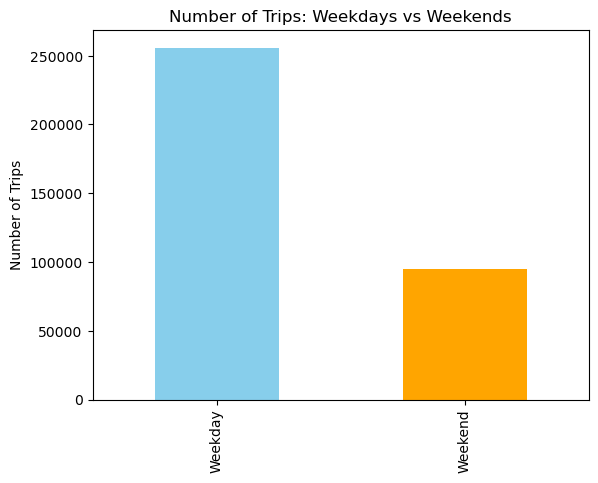

In [863]:
# Compare traffic trends for the week days and weekends
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])
trip_counts = df.groupby('is_weekend').size()
trip_counts.index = ['Weekday', 'Weekend']
trip_counts.plot(kind='bar', color=['skyblue', 'orange'], title='Number of Trips: Weekdays vs Weekends')
plt.ylabel('Number of Trips')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

Top 10 Pickup Zones: zone
JFK Airport                     18619
LaGuardia Airport               12387
Midtown Center                   6919
Upper East Side North            5458
Times Sq/Theatre District        5457
Penn Station/Madison Sq West     5446
Midtown East                     5330
Lincoln Square East              5020
Upper East Side South            4918
East Chelsea                     4503
Name: count, dtype: int64
Top 10 Dropoff Zones: zone
JFK Airport                  194
Central Park                  37
Upper East Side North         29
Upper East Side South         29
LaGuardia Airport             26
Lincoln Square East           20
Upper West Side South         20
Times Sq/Theatre District     18
Yorkville East                17
East Village                  15
Name: count, dtype: int64


Text(0, 0.5, 'Zone')

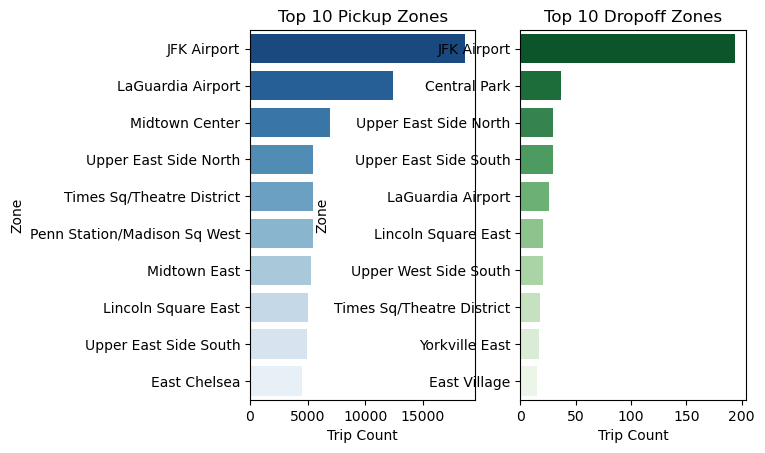

In [993]:
# Find top 10 pickup and dropoff zones
top_10_pickup_zones = merged_df['zone'][merged_df['PULocationID'] == merged_df['LocationID']].value_counts().head(10)

# Top 10 dropoff zones
top_10_dropoff_zones = merged_df['zone'][merged_df['DOLocationID'] == merged_df['LocationID']].value_counts().head(10)

print("Top 10 Pickup Zones:", top_10_pickup_zones)
print("Top 10 Dropoff Zones:", top_10_dropoff_zones)

plt.subplot(1, 2, 1)
sns.barplot(x=top_10_pickup_zones.values, y=top_10_pickup_zones.index, palette='Blues_r')
plt.title('Top 10 Pickup Zones')
plt.xlabel('Trip Count')
plt.ylabel('Zone')

# Plot dropoff zones
plt.subplot(1, 2, 2)
sns.barplot(x=top_10_dropoff_zones.values, y=top_10_dropoff_zones.index, palette='Greens_r')
plt.title('Top 10 Dropoff Zones')
plt.xlabel('Trip Count')
plt.ylabel('Zone')

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

 Top 10 Pickup/Dropoff Ratios:
 70     8.019231
132    4.676478
138    2.907735
186    1.551835
43     1.397978
249    1.349799
114    1.343364
162    1.272130
161    1.191626
234    1.191189
Name: pickup_dropoff_ratio, dtype: float64
Bottom 10 Pickup/Dropoff Ratios:
 184    0.0
115    0.0
30     0.0
176    0.0
172    0.0
99     0.0
206    0.0
156    0.0
8      0.0
245    0.0
Name: pickup_dropoff_ratio, dtype: float64


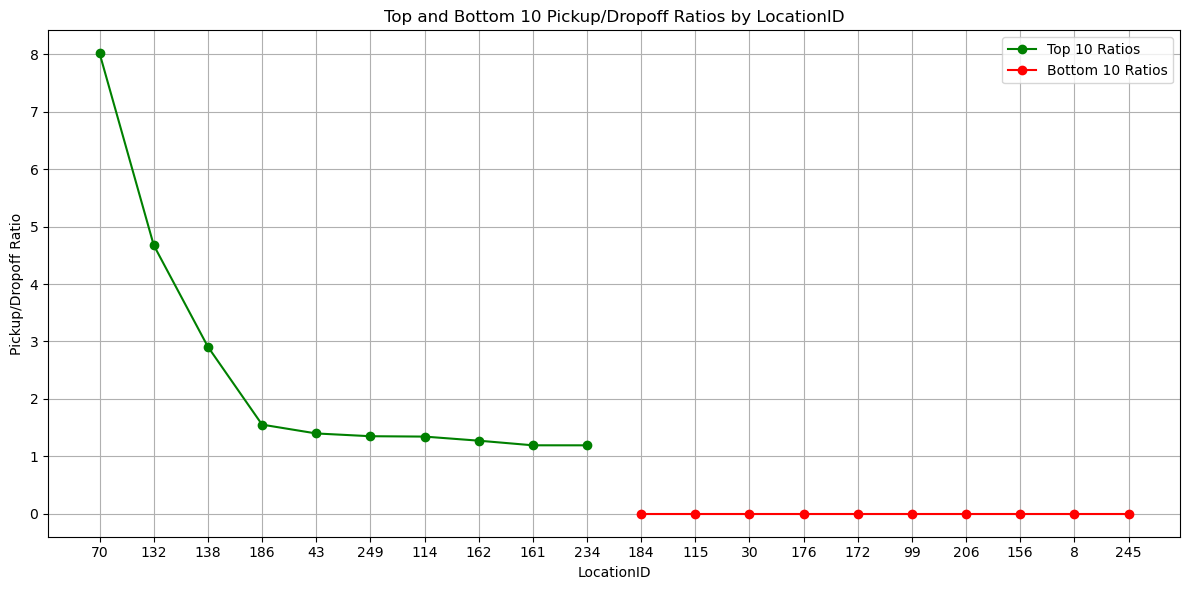

In [1003]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df['PULocationID'].value_counts()
dropoff_counts = df['DOLocationID'].value_counts()

# Combine the two counts into a DataFrame
location_counts = pd.DataFrame({
    'pickup_count': pickup_counts,
    'dropoff_count': dropoff_counts
}).fillna(0)  # Fill NaN values with 0 where there were no pickups or dropoffs

# Calculate the pickup/dropoff ratio
location_counts['pickup_dropoff_ratio'] = location_counts['pickup_count'] / location_counts['dropoff_count']

# Top 10 pickup/dropoff ratios
top_10_ratio = location_counts['pickup_dropoff_ratio'].sort_values(ascending=False).head(10)

# Bottom 10 pickup/dropoff ratios
bottom_10_ratio = location_counts['pickup_dropoff_ratio'].sort_values().head(10)

# Display the results
print(" Top 10 Pickup/Dropoff Ratios:\n", top_10_ratio)
print("Bottom 10 Pickup/Dropoff Ratios:\n", bottom_10_ratio)

plt.figure(figsize=(12, 6))
plt.plot(top_10_ratio.index.astype(str), top_10_ratio.values, marker='o', label='Top 10 Ratios', color='green')
plt.plot(bottom_10_ratio.index.astype(str), bottom_10_ratio.values, marker='o', label='Bottom 10 Ratios', color='red')
plt.xlabel('LocationID')
plt.ylabel('Pickup/Dropoff Ratio')
plt.title('Top and Bottom 10 Pickup/Dropoff Ratios by LocationID')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [881]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours_df = merged_df[(merged_df['pickup_hour'] >= 23) | (merged_df['pickup_hour'] <= 5)]
#selecting top 5 pickup zones : 
top_night_pickups = (
    night_hours_df.groupby('PULocationID')
    .size()
    .reset_index(name='pickup_count')
    .sort_values(by='pickup_count', ascending=False)
    .head(10)
)

#selection top 5 dropoff zones:

top_night_dropoffs = (
    night_hours_df.groupby('DOLocationID')
    .size()
    .reset_index(name='dropoff_count')
    .sort_values(by='dropoff_count', ascending=False)
    .head(10)
)
#merge zones in above
zone_lookup = merged_df[['LocationID', 'zone']].drop_duplicates()

top_night_pickups = top_night_pickups.merge(
    zone_lookup, left_on='PULocationID', right_on='LocationID', how='left'
)

top_night_dropoffs = top_night_dropoffs.merge(
    zone_lookup, left_on='DOLocationID', right_on='LocationID', how='left'
)

print(top_night_pickups[['PULocationID', 'zone', 'pickup_count']])

print(top_night_dropoffs[['DOLocationID', 'zone', 'dropoff_count']])

   PULocationID                          zone  pickup_count
0            79                  East Village          2913
1           132                   JFK Airport          2890
2           249                  West Village          2387
3            48                  Clinton East          1942
4           148               Lower East Side          1835
5           230     Times Sq/Theatre District          1630
6           114       Greenwich Village South          1581
7           186  Penn Station/Madison Sq West          1309
8           138             LaGuardia Airport          1246
9           164                 Midtown South          1155
   DOLocationID                           zone  dropoff_count
0            79                   East Village           1614
1            48                   Clinton East           1352
2           170                    Murray Hill           1194
3           107                       Gramercy           1103
4            68               

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Night Revenue Share{0} 12.390267356414645
Day Revenue Share{0} 87.60973264358536


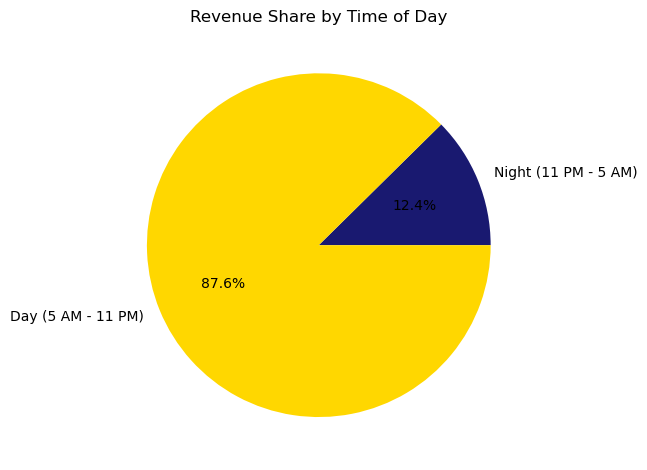

In [1011]:
# Filter for night hours (11 PM to 5 AM)

night_df = merged_df[(merged_df['pickup_hour'] >= 23) | (merged_df['pickup_hour'] <= 5)]
day_df = merged_df[(merged_df['pickup_hour'] > 5) & (merged_df['pickup_hour'] < 23)]

night_revenue = night_df['total_amount'].sum()

day_revenue = day_df['total_amount'].sum()
total_revenue = night_revenue + day_revenue

# Revenue shares
night_share = night_revenue / total_revenue
day_share = day_revenue / total_revenue

night_share_percentage = night_share * 100
day_share_percentage = day_share * 100

print("Night Revenue Share{0}" ,night_share_percentage)
print("Day Revenue Share{0}",day_share_percentage)
revenue_share_df = pd.DataFrame({
    'Time': ['Night (11 PM - 5 AM)', 'Day (5 AM - 11 PM)'],
    'Revenue Share (%)': [night_share_percentage, day_share_percentage]
})
revenue_share_df.set_index('Time').plot(
    kind='pie',
    y='Revenue Share (%)',
    autopct='%1.1f%%',
    colors=['midnightblue', 'gold'],
    legend=False,
    ylabel=''
)
plt.title('Revenue Share by Time of Day')
plt.tight_layout()
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [889]:
# Analyse the fare per mile per passenger for different passenger counts

#since we have not removed zeros due to standardization of columns , we have to ignore them to avoid NANs
valid_df = merged_df[
    (merged_df['fare_amount'] > 0) &
    (merged_df['trip_distance'] > 0) &
    (merged_df['passenger_count'] > 0) &
    (merged_df['fare_amount'].notnull()) &
    (merged_df['trip_distance'].notnull()) &
    (merged_df['passenger_count'].notnull())
]

# Step 2: Calculate fare per mile and fare per mile per passenger
valid_df['fare_per_mile'] = valid_df['fare_amount'] / valid_df['trip_distance']
valid_df['fare_per_mile_per_passenger'] = valid_df['fare_per_mile'] / valid_df['passenger_count']

# Step 3: Group by passenger count and calculate the average fare per mile per passenger
avg_fare_by_passenger = (
    valid_df.groupby('passenger_count')['fare_per_mile_per_passenger']
    .mean()
    .reset_index()
    .rename(columns={'fare_per_mile_per_passenger': 'avg_fare_per_mile_per_passenger'})
    .sort_values('passenger_count')
)

# Step 4: Display the results
print(avg_fare_by_passenger)

   passenger_count  avg_fare_per_mile_per_passenger
0              1.0                         1.475426
1              2.0                         0.726821
2              3.0                         0.468668
3              4.0                         0.412746
4              5.0                         0.266746
5              6.0                         0.225846


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

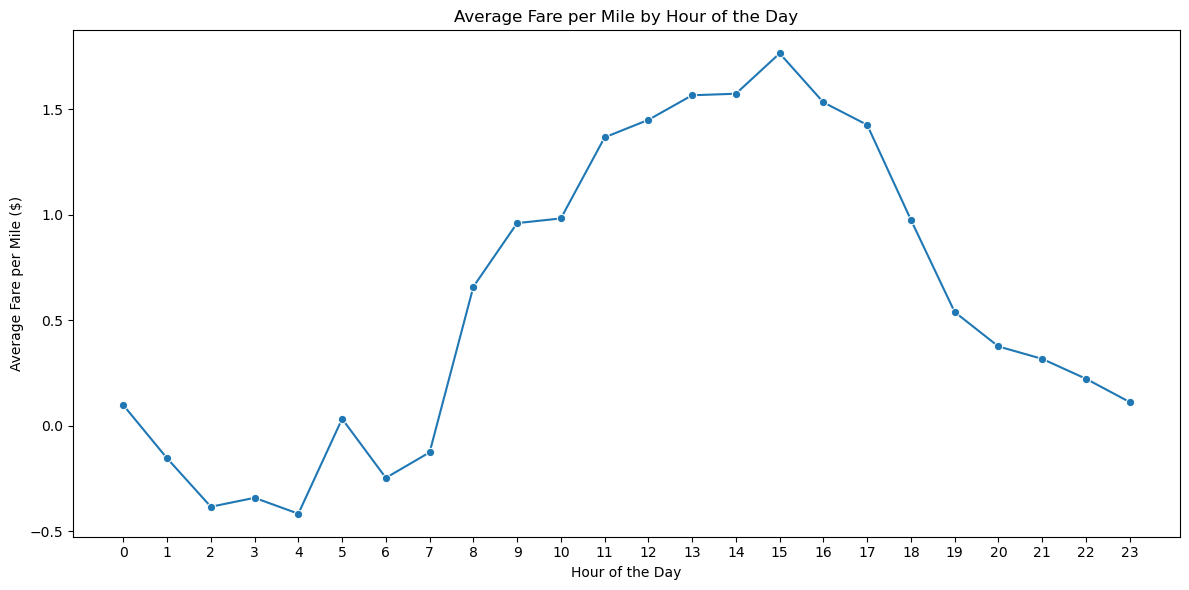

In [917]:
merged_df = merged_df[merged_df['trip_distance'] > 0]

# Recalculate fare per mile if needed
merged_df['fare_per_mile'] = merged_df['fare_amount'] / merged_df['trip_distance']

# Drop rows with NaNs in fare_per_mile
merged_df = merged_df.dropna(subset=['fare_per_mile'])

# Group and compute average fare per mile by pickup hour
avg_fare_by_hour = (
    merged_df.groupby('pickup_hour')['fare_per_mile']
    .mean()
    .reset_index()
)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_fare_by_hour, x='pickup_hour', y='fare_per_mile', marker='o')
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

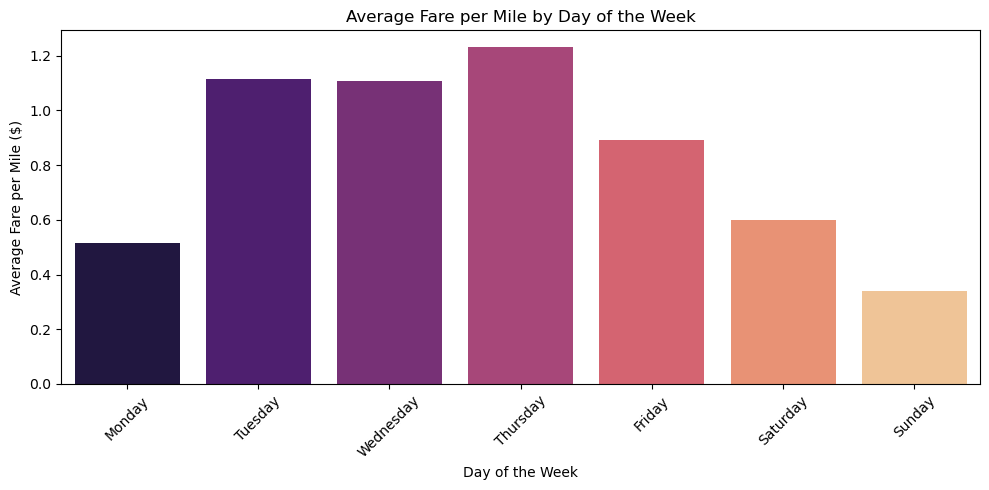

In [919]:
# Compare the average fare per mile for different days and for different times of the day


merged_df = merged_df[merged_df['trip_distance'] > 0]


merged_df['fare_per_mile'] = merged_df['fare_amount'] / merged_df['trip_distance']


merged_df = merged_df.dropna(subset=['fare_per_mile', 'day_of_week'])

# Create day order to keep weekday sequence
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by day_of_week and calculate average fare per mile
avg_fare_by_day = (
    merged_df.groupby('day_of_week')['fare_per_mile']
    .mean()
    .reindex(day_order)
    .reset_index()
)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_fare_by_day, x='day_of_week', y='fare_per_mile', palette='magma')
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

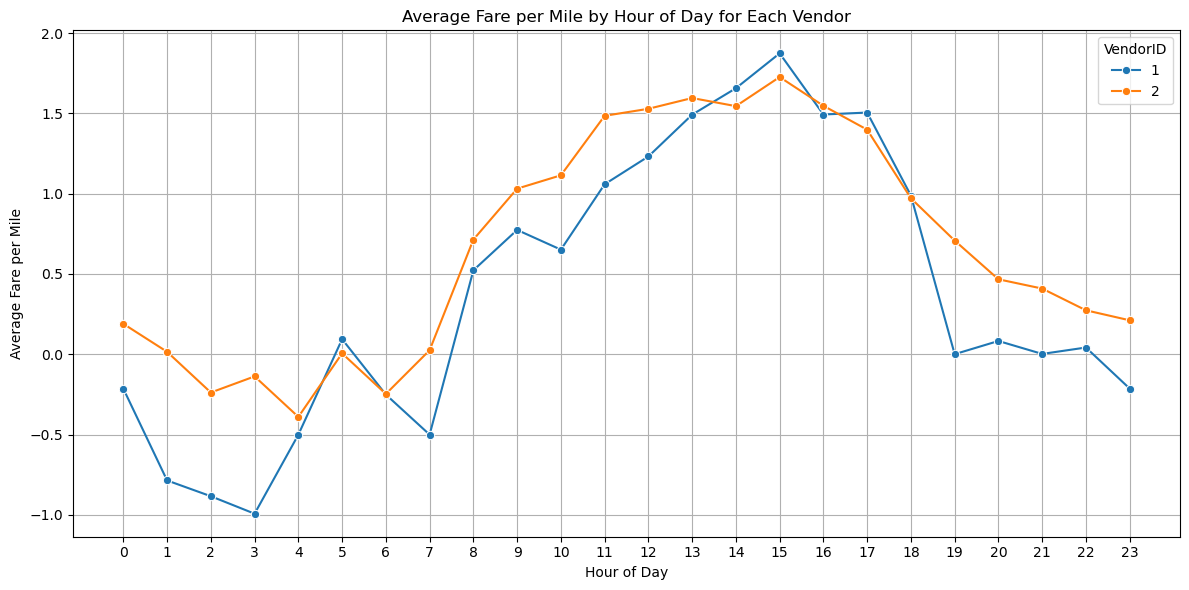

In [989]:
# Compare fare per mile for different vendors

vendor_hourly_fare = (
    merged_df.groupby(['VendorID', 'pickup_hour'])['fare_per_mile']
    .mean()
    .reset_index()
)

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=vendor_hourly_fare,
    x='pickup_hour',
    y='fare_per_mile',
    hue='VendorID',
    marker='o',
    palette='tab10'
)

plt.title('Average Fare per Mile by Hour of Day for Each Vendor')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='VendorID')
plt.tight_layout()
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


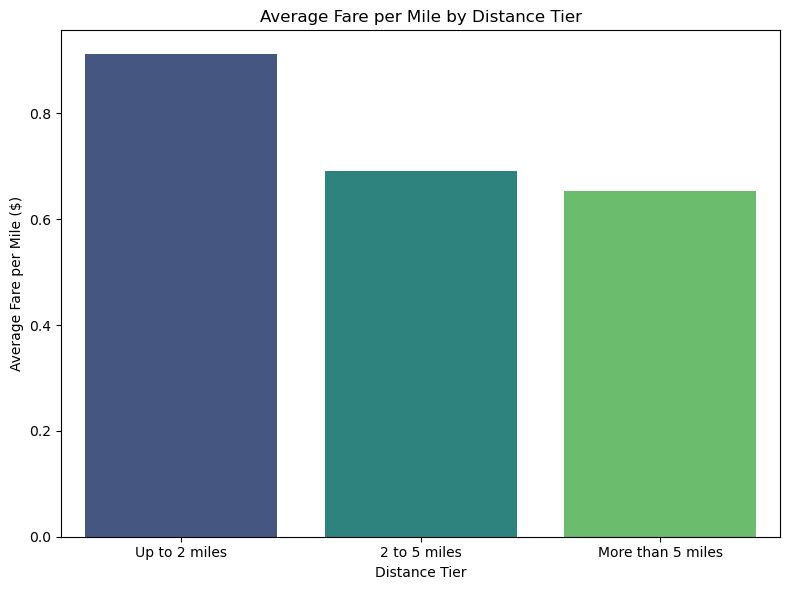

In [957]:
# Defining distance tiers

df_valid = merged_df[(merged_df['trip_distance'].notna()) & (merged_df['trip_distance'] > 0)].copy()

# Define bins and labels
bins = [0, 2, 5, float('inf')]
labels = ['Up to 2 miles', '2 to 5 miles', 'More than 5 miles']
df_valid['distance_tier'] = pd.cut(df_valid['trip_distance'], bins=bins, labels=labels, right=False)

# Calculate fare per mile
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

# Group by distance tier and calculate average fare per mile
avg_fare_by_tier = df_valid.groupby('distance_tier')['fare_per_mile'].mean()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_fare_by_tier.index, y=avg_fare_by_tier.values, palette='viridis')
plt.title("Average Fare per Mile by Distance Tier")
plt.xlabel("Distance Tier")
plt.ylabel("Average Fare per Mile ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [959]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
merged_df['tip_percentage'] = (merged_df['tip_amount'] / merged_df['fare_amount']) * 100
bins = [0, 2, 5, float('inf')]
labels = ['0-2 miles', '2-5 miles', '5+ miles']
merged_df['distance_tier'] = pd.cut(df['trip_distance'], bins=bins, labels=labels)

avg_tip_by_distance = merged_df.groupby('distance_tier')['tip_percentage'].mean()
avg_tip_by_passenger = merged_df.groupby('passenger_count')['tip_percentage'].mean()
avg_tip_by_hour = merged_df.groupby('pickup_hour')['tip_percentage'].mean()



plt.figure(figsize=(16, 10))

# Tip % by distance
plt.subplot(3, 1, 1)
sns.barplot(x=avg_tip_by_distance.index, y=avg_tip_by_distance.values, palette="coolwarm")
plt.title("Average Tip Percentage by Trip Distance Tier")
plt.ylabel("Tip %")

# Tip % by passenger count
plt.subplot(3, 1, 2)
sns.lineplot(x=avg_tip_by_passenger.index, y=avg_tip_by_passenger.values, marker='o', color="orange")
plt.title("Average Tip Percentage by Passenger Count")
plt.ylabel("Tip %")
plt.xlabel("Passenger Count")

# Tip % by pickup hour
plt.subplot(3, 1, 3)
sns.lineplot(x=avg_tip_by_hour.index, y=avg_tip_by_hour.values, marker='o', color="green")
plt.title("Average Tip Percentage by Pickup Hour")
plt.ylabel("Tip %")
plt.xlabel("Hour of Day")

plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [961]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

merged_df['tip_percentage'] = (merged_df['tip_amount'] / merged_df['fare_amount']) * 100
low_tip = merged_df[merged_df['tip_percentage'] < 10]
high_tip = merged_df[merged_df['tip_percentage'] > 25]
comparison = pd.DataFrame({
    'Low Tip (<10%)': low_tip[['fare_amount', 'trip_distance', 'passenger_count', 'trip_duration']].mean(),
    'High Tip (>25%)': high_tip[['fare_amount', 'trip_distance', 'passenger_count', 'trip_duration']].mean()
})
print(comparison)

                 Low Tip (<10%)  High Tip (>25%)
fare_amount            1.113995         1.371189
trip_distance          1.602761         1.944810
passenger_count        1.400392         1.380593
trip_duration         24.936254        25.833281


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

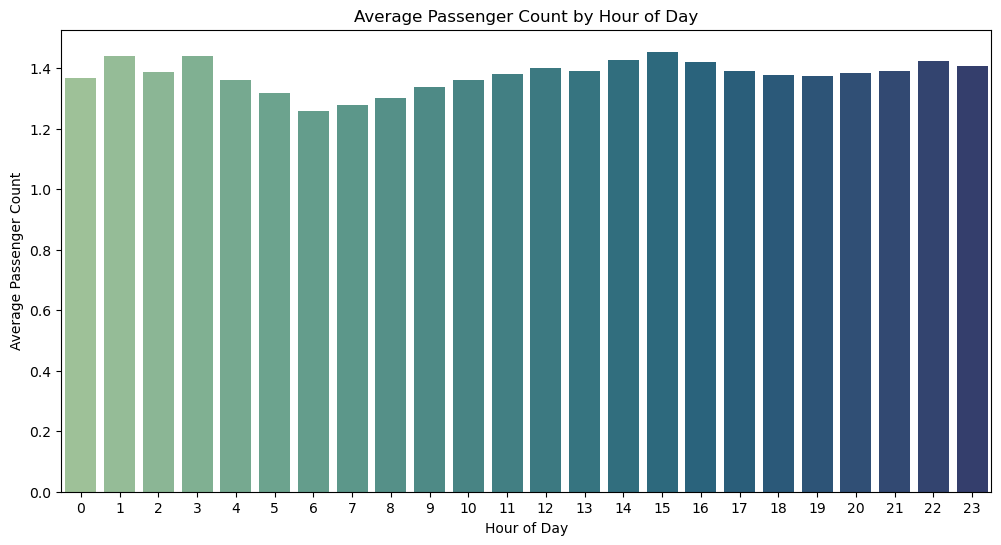

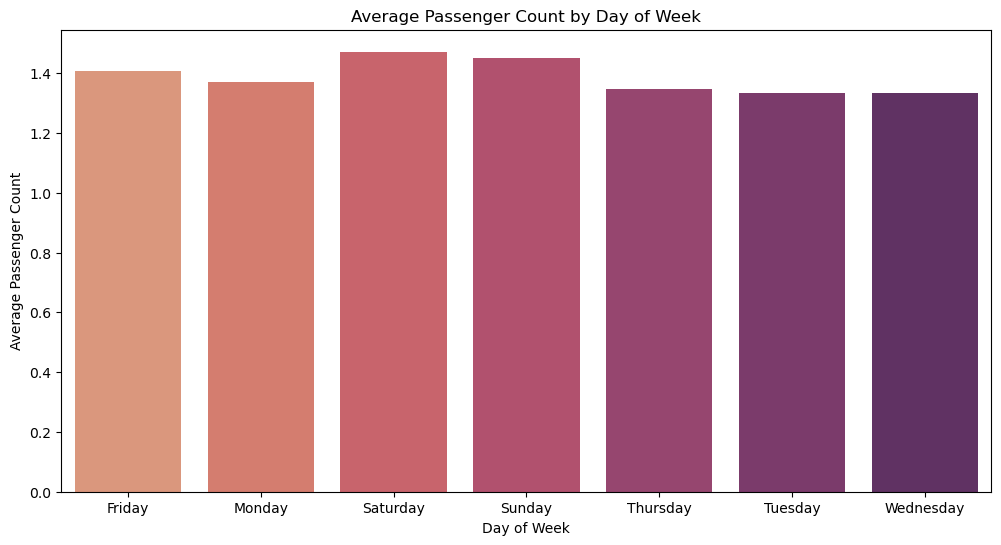

In [963]:
# See how passenger count varies across hours and days

#hours
passenger_by_hour = merged_df.groupby('pickup_hour')['passenger_count'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=passenger_by_hour.index, y=passenger_by_hour.values, palette='crest')
plt.title("Average Passenger Count by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Passenger Count")
plt.xticks(range(0, 24))
plt.show()

#days
passenger_by_day = merged_df.groupby('day_of_week')['passenger_count'].mean()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
merged_df['day_of_week'] = pd.Categorical(merged_df['day_of_week'], categories=day_order, ordered=True)
plt.figure(figsize=(12, 6))
sns.barplot(x=passenger_by_day.index, y=passenger_by_day.values, palette='flare')
plt.title("Average Passenger Count by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Passenger Count")
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

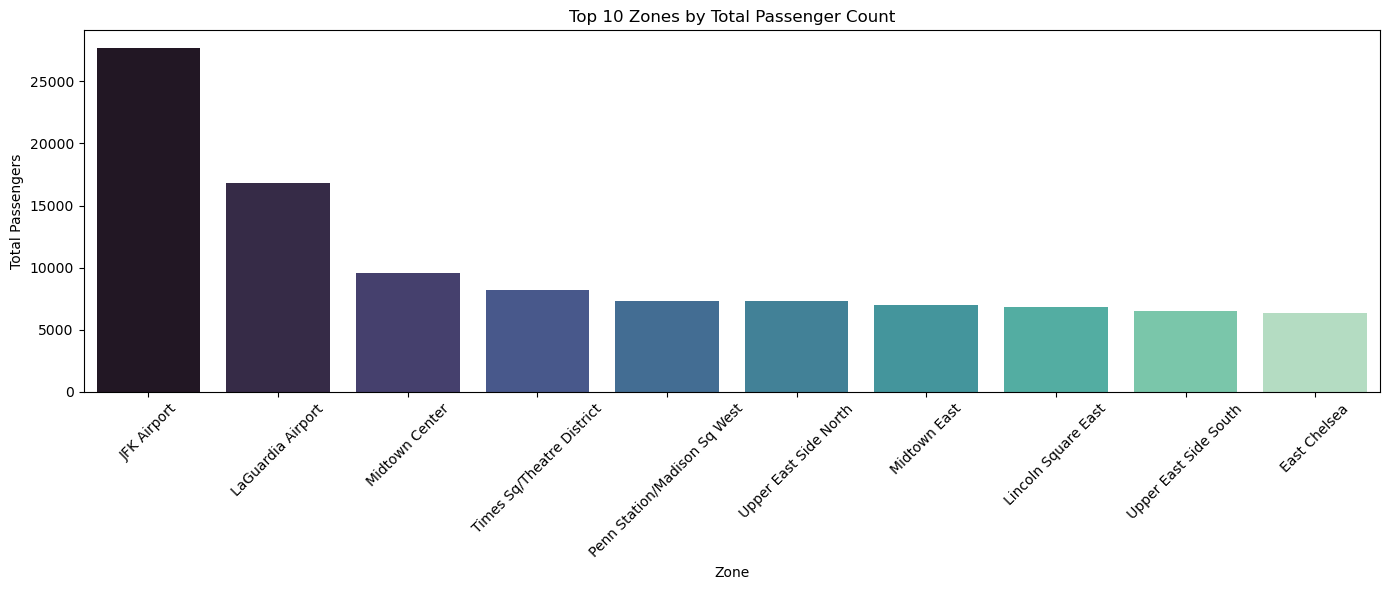

In [951]:
# How does passenger count vary across zones
#using merged_df df

passenger_by_zone = merged_df.groupby('zone')['passenger_count'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=passenger_by_zone.head(10).index, y=passenger_by_zone.head(10).values, palette='mako')
plt.title("Top 10 Zones by Total Passenger Count")
plt.xlabel("Zone")
plt.ylabel("Total Passengers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [953]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

zone_avg_passenger = merged_df.groupby('zone')['passenger_count'].mean()
merged_df['zone_avg_passenger'] = merged_df['zone'].map(zone_avg_passenger)
merged_df[['zone', 'passenger_count', 'zone_avg_passenger']].head()

zone  passenger_count  zone_avg_passenger
0           LaGuardia Airport              1.0            1.354646
4   West Chelsea/Hudson Yards              2.0            1.384903
6                East Village              1.0            1.396123
7                 JFK Airport              1.0            1.489017
10               East Village              1.0            1.396123

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

                       Applied Count  Total Trips  Applied %
extra                       113429.0     174674.0      64.94
mta_tax                     172819.0     174674.0      98.94
improvement_surcharge       174667.0     174674.0     100.00
congestion_surcharge        155035.0     174674.0      88.76
airport_fee                  31109.0     174674.0      17.81


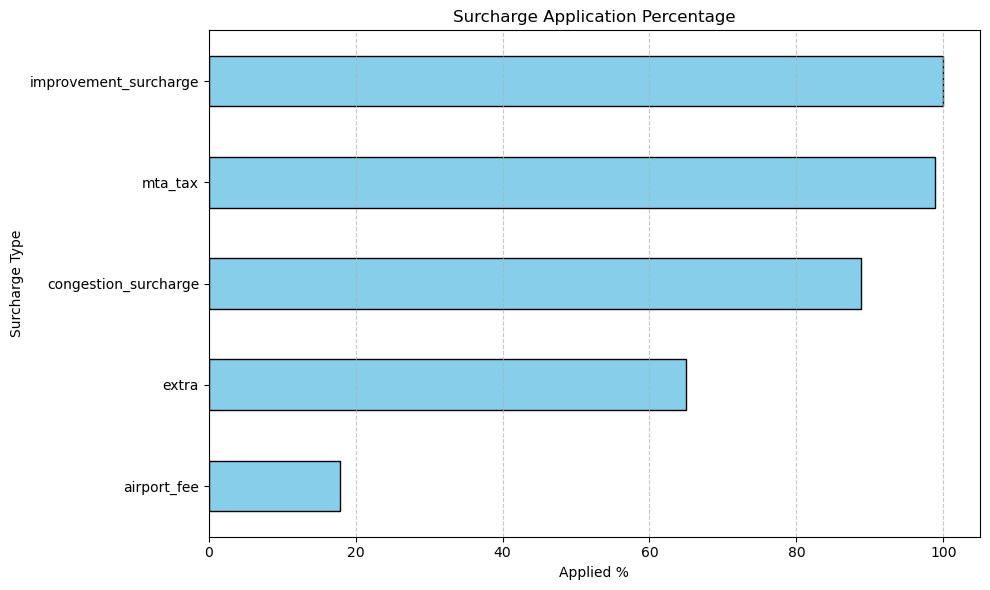

In [1013]:
# How often is each surcharge applied?

surcharge_columns = [
    'extra',
    'mta_tax',
    'improvement_surcharge',
    'congestion_surcharge',
    'airport_fee'
]

surcharge_application = {}

for col in surcharge_columns:
    applied_count = (merged_df[col] > 0).sum()
    total_count = merged_df[col].notna().sum()
    surcharge_application[col] = {
        'Applied Count': applied_count,
        'Total Trips': total_count,
        'Applied %': round(100 * applied_count / total_count, 2)
    }

# Convert to DataFrame for nicer view
surcharge_df = pd.DataFrame(surcharge_application).T
print(surcharge_df)

surcharge_df_sorted = surcharge_df.sort_values(by='Applied %', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
surcharge_df_sorted['Applied %'].plot(
    kind='barh',
    color='skyblue',
    edgecolor='black'
)

plt.title('Surcharge Application Percentage')
plt.xlabel('Applied %')
plt.ylabel('Surcharge Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [987]:
#1)Fare per mile is highest in Murray hills , JFK airport and East Chelsea
#2)increase cabs count in September and October as these months have most revenue with taxi trips
#3)Remove Extra taxis “Freshkills Park”, “Eltingville/Annadale/Prince's Bay”,” Country Club” etc as very few or no trips are coming out from these areas.
#4)In weekdays around 3pm-5pm we have we have maximum average fare per mile, placing more cabs around this time and day helps increasing revenue.
#5)JFK has Most trips and placing more taxis to handle the Pickup can drive more profits and tips to drivers
#6)Closely followed by “Upper East Side South” and “Midtown Center” , placing more Taxis here would drive more business.



        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
329565         1  2023-09-06 16:57:54   2023-09-06 17:16:45              2.0   
29195          2  2023-10-01 21:42:04   2023-10-01 22:00:06              2.0   
48359          1  2023-10-20 15:56:21   2023-10-20 16:07:58              1.0   
37521          2  2023-10-10 13:20:55   2023-10-10 13:30:28              1.0   
71816          2  2023-11-11 15:12:28   2023-11-11 15:51:42              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
329565       0.008734         5.0                  N           170   
29195        0.039301         5.0                  N           265   
48359        0.008734         2.0                  N           132   
37521        0.013100         2.0                  N            68   
71816        0.004367         1.0                  N            68   

        DOLocationID  payment_type  ...          zone  LocationID    borough  \
329565            

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [983]:
#1)Evening 4-7pm , count of taxi should be increased , as these are busiest time and we can generate more profits by trips during this time.
#2)Weekday and weekend count should be managed as in a way as weekdays more taxi count should be in zones and weekends footfall is low ,
#so we can reduce weekend idle taxis.
#3)Day revenue is much more as compare to night , keeping more taxis on PU and DO zones is more helpful
#4)Average fare per mile by hour of day is highest around 3-5pm, this should help in putting more taxis in high PU zones.
#5)Clearly evident that total passenger are more on JFK airport followed by Laguardia Airport, with slight dip in Midtown center.


<class 'pandas.core.frame.DataFrame'>
Index: 174674 entries, 0 to 350795
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   VendorID                     174674 non-null  int64         
 1   tpep_pickup_datetime         174674 non-null  datetime64[us]
 2   tpep_dropoff_datetime        174674 non-null  datetime64[us]
 3   passenger_count              174674 non-null  float64       
 4   trip_distance                174674 non-null  float64       
 5   RatecodeID                   174674 non-null  float64       
 6   store_and_fwd_flag           174674 non-null  object        
 7   PULocationID                 174674 non-null  int64         
 8   DOLocationID                 174674 non-null  int64         
 9   payment_type                 174674 non-null  int64         
 10  fare_amount                  174674 non-null  float64       
 11  extra                        17

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [985]:
#1)Seems to be shorted trip generates more fare per mile , as seen in bins distribution , this tend to decrease with increasing distance
#2)Amongst the two vendors, their pattern grows and falls in same proportion , with slight of Average fare posted highest by Vendor 1 at 3pm,
#but uniformly throughout day Vendor 2 seems to have highest average fare.
#3) With locations Glendale , Corona, Totten , Norwood we have heighest fare_per_mile placing more cabs here would increase revenue with less consumption of GAS.
#4) Single occupancy in trips generate more average fare per mile

     LocationID                     zone  fare_per_mile
92        102.0                 Glendale      18.657607
51         56.0                   Corona      13.007086
12         15.0  Bay Terrace/Fort Totten      11.747478
154       174.0                  Norwood      10.916472
121       139.0                Laurelton       9.902330
